In [26]:
# Install required libraries (run once)
%pip install -q pandas numpy matplotlib scikit-learn pillow


2208.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [27]:
# Imports and dataset path setup
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from PIL import Image

# Set dataset base directory
BASE_DIR = "TrashType_Image_Dataset"
CLASSES = sorted([d for d in os.listdir(BASE_DIR) if os.path.isdir(os.path.join(BASE_DIR, d))])
print("Classes:", CLASSES)


Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [28]:
# Install required libraries (run once)
!pip install --quiet pandas numpy matplotlib scikit-learn pillow


2214.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [29]:
# Install required libraries (run once)
!# Imports and dataset path setup
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from PIL import Image

# Set dataset base directory
BASE_DIR = "TrashType_Image_Dataset"
CLASSES = sorted([d for d in os.listdir(BASE_DIR) if os.path.isdir(os.path.join(BASE_DIR, d))])
print("Classes:", CLASSES) 

2220.76s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [30]:
# Build a simple DataFrame of image file paths and labels
image_paths = []
labels = []

for label in CLASSES:
    folder = os.path.join(BASE_DIR, label)
    for file_name in os.listdir(folder):
        if file_name.lower().endswith((".jpg", ".jpeg", ".png")):
            image_paths.append(os.path.join(folder, file_name))
            labels.append(label)

data = pd.DataFrame({"path": image_paths, "label": labels})
print("Total images:", len(data))
data.head()


Total images: 2527


,path,label
0,TrashType_Image_Dataset/cardboard/cardboard_26...,cardboard
1,TrashType_Image_Dataset/cardboard/cardboard_27...,cardboard
2,TrashType_Image_Dataset/cardboard/cardboard_29...,cardboard
3,TrashType_Image_Dataset/cardboard/cardboard_05...,cardboard
4,TrashType_Image_Dataset/cardboard/cardboard_06...,cardboard


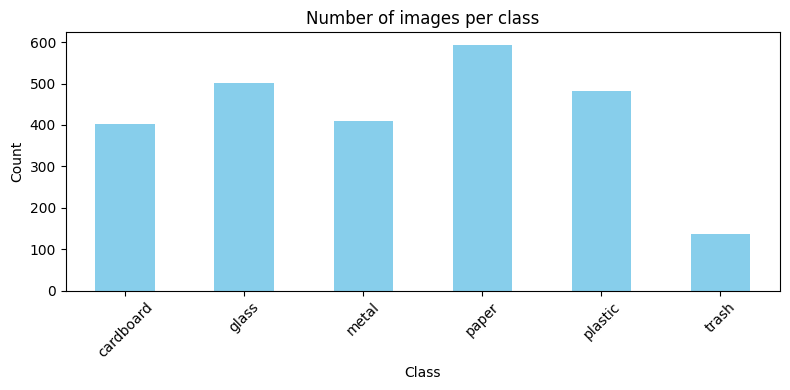

In [31]:
# Plot class distribution (how many images per class)
class_counts = data["label"].value_counts().sort_index()
ax = class_counts.plot(kind="bar", color="skyblue", figsize=(8,4))
plt.title("Number of images per class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


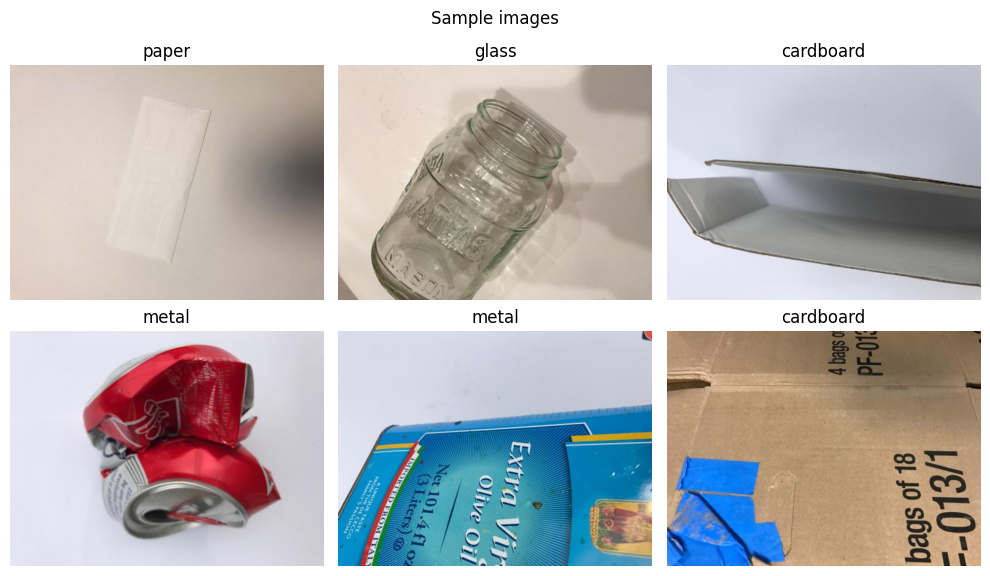

In [32]:
# Show a few example images from the dataset
num_examples = 6
sample_rows = data.sample(n=min(num_examples, len(data)), random_state=42)

plt.figure(figsize=(10,6))
for i, (_, row) in enumerate(sample_rows.iterrows(), start=1):
    img = Image.open(row["path"]).convert("RGB")
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.title(row["label"]) 
    plt.axis("off")
plt.suptitle("Sample images")
plt.tight_layout()
plt.show()


In [33]:
# Load and resize images into X (features) and y (labels)
image_size = (64, 64)  # keep small for speed and simplicity

X_list = []
y_list = []

for _, row in data.iterrows():
    try:
        img = Image.open(row["path"]).convert("RGB")
        img = img.resize(image_size)
        arr = np.array(img, dtype=np.uint8)  # shape: (64, 64, 3)
        X_list.append(arr)
        y_list.append(row["label"])
    except Exception as e:
        # Skip unreadable images
        print("Failed to read:", row["path"], "-", e)

X = np.stack(X_list, axis=0)
y = np.array(y_list)
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2527, 64, 64, 3)
y shape: (2527,)


In [34]:
# Encode labels as numbers and split into train and test sets
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Label classes:", list(label_encoder.classes_))

# Flatten images to simple feature vectors
num_samples = X.shape[0]
X_flat = X.reshape(num_samples, -1).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Label classes: [np.str_('cardboard'), np.str_('glass'), np.str_('metal'), np.str_('paper'), np.str_('plastic'), np.str_('trash')]
Train shape: (2021, 12288) Test shape: (506, 12288)


In [35]:
# Scale features (helps many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled train mean (approx 0):", np.round(X_train_scaled.mean(), 4))


Scaled train mean (approx 0): 0.0


In [36]:
# Train a simple Logistic Regression classifier
model = LogisticRegression(max_iter=1000, multi_class="auto")
model.fit(X_train_scaled, y_train)

print("Model trained.")


/Users/aakashijaiswal/Downloads/Waste Management/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model trained.


In [37]:
# Final print of model accuracy
print(f"Final model accuracy: {acc:.4f}")


Final model accuracy: 0.4111


In [38]:
# Save model artifacts for the web app
import os, pickle

ARTIFACT_DIR = "models"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

artifacts = {
    "model": model,
    "scaler": scaler,
    "label_classes": list(label_encoder.classes_),
    "image_size": (64, 64)  # must match training
}

with open(os.path.join(ARTIFACT_DIR, "waste_classifier.pkl"), "wb") as f:
    pickle.dump(artifacts, f)

print("Saved artifacts to:", os.path.join(ARTIFACT_DIR, "waste_classifier.pkl"))


Saved artifacts to: models/waste_classifier.pkl


Accuracy: 0.4111
Confusion matrix:
 [[40 14  3  9  9  6]
 [ 6 38 24  6 18  8]
 [ 8 20 18 11 18  7]
 [18 17  6 60 15  3]
 [10 20  7 14 45  1]
 [ 4  6  5  1  4  7]]


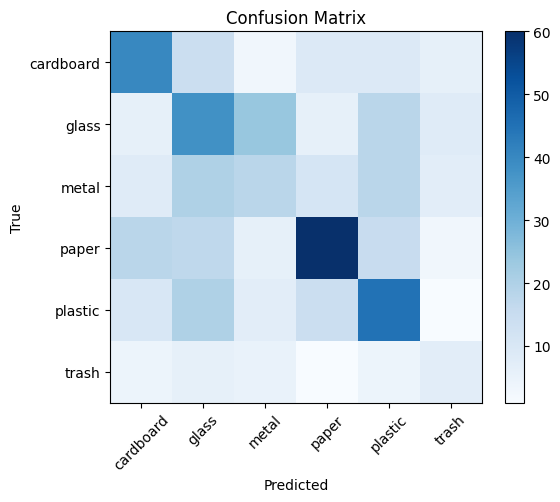


Classification Report:

              precision    recall  f1-score   support

   cardboard       0.47      0.49      0.48        81
       glass       0.33      0.38      0.35       100
       metal       0.29      0.22      0.25        82
       paper       0.59      0.50      0.55       119
     plastic       0.41      0.46      0.44        97
       trash       0.22      0.26      0.24        27

    accuracy                           0.41       506
   macro avg       0.38      0.39      0.38       506
weighted avg       0.42      0.41      0.41       506



In [39]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 4))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.yticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.tight_layout()
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


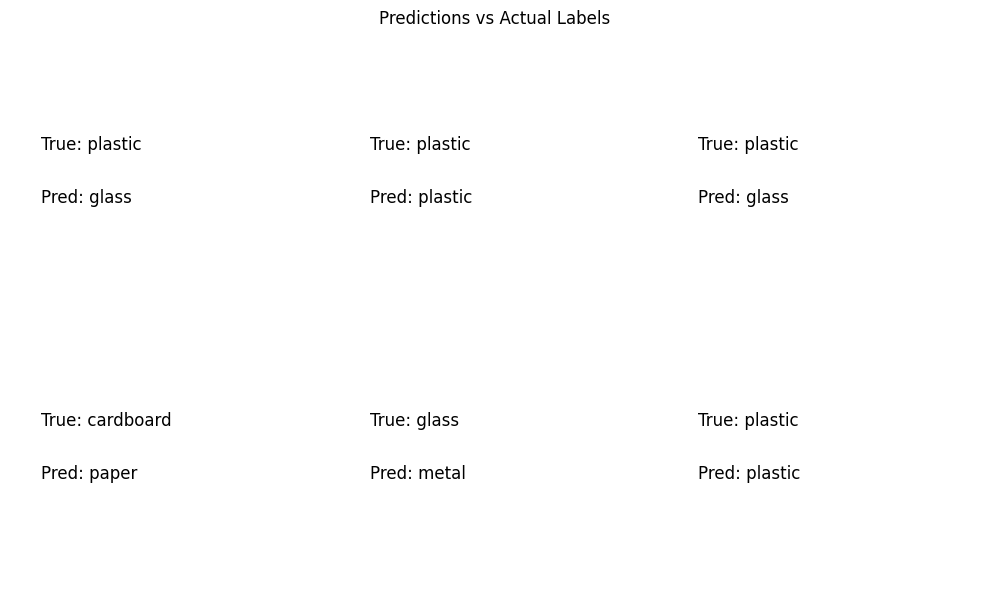

In [40]:
# Look at a few predictions vs actual labels
n_show = 6
indices = np.random.choice(len(y_test), size=min(n_show, len(y_test)), replace=False)
plt.figure(figsize=(10,6))
for i, idx in enumerate(indices, start=1):
    # Find the original image index: we need to reconstruct from test features
    # For simplicity in this beginner notebook, we won't reconstruct images here.
    # Instead, we just show the predicted vs actual labels.
    true_label = label_encoder.classes_[y_test[idx]]
    pred_label = label_encoder.classes_[y_pred[idx]]
    plt.subplot(2, 3, i)
    plt.text(0.1, 0.6, f"True: {true_label}", fontsize=12)
    plt.text(0.1, 0.4, f"Pred: {pred_label}", fontsize=12)
    plt.axis("off")
plt.suptitle("Predictions vs Actual Labels")
plt.tight_layout()
plt.show()
